In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
cancer = pd.read_csv('data.csv')
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
# replacing inputs of '?' with NaN
#cancer.replace('?', np.nan, inplace = True)
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
cancer.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0
857,29,2,20,1,0,0,0,1,0.5,0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
cancer.shape

(858, 36)

In [6]:
len(cancer)

858

In [7]:
# finding missing values in the variables
cancer.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
cancer.dropna(inplace=True)
#cancer=cancer.dropna()

In [9]:
cancer.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [10]:
cancer.duplicated().sum()

23

In [11]:
cancer.drop_duplicates(inplace=True)

In [12]:
cancer.duplicated().sum()

0

In [13]:
cancer.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [14]:

cancer.info()
#cancer=pd.DataFrame(caner)

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 835 non-null    int64 
 1   Number of sexual partners           835 non-null    object
 2   First sexual intercourse            835 non-null    object
 3   Num of pregnancies                  835 non-null    object
 4   Smokes                              835 non-null    object
 5   Smokes (years)                      835 non-null    object
 6   Smokes (packs/year)                 835 non-null    object
 7   Hormonal Contraceptives             835 non-null    object
 8   Hormonal Contraceptives (years)     835 non-null    object
 9   IUD                                 835 non-null    object
 10  IUD (years)                         835 non-null    object
 11  STDs                                835 non-null    object
 12 

In [15]:
cancer.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:

cancer_yes = cancer[cancer['Dx:Cancer']== 1]['Age']

In [17]:

cancer_yes.describe()

count    18.000000
mean     33.222222
std       8.235901
min      19.000000
25%      27.500000
50%      31.500000
75%      38.000000
max      52.000000
Name: Age, dtype: float64

In [18]:
cancer['Dx:Cancer'].value_counts()

Dx:Cancer
0    817
1     18
Name: count, dtype: int64

In [19]:
cancer['STDs'].value_counts()

STDs
0    656
?    100
1     79
Name: count, dtype: int64

In [20]:
cancer['STDs'].duplicated().sum()

832

In [21]:
cancer_md = cancer.dropna(subset = ['IUD', 'STDs:HPV', 'Dx:HPV', 'Biopsy', 'Citology', 'Schiller', 'Age','STDs'])

In [22]:

cancer_md

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Histogram of Age in Positive Dx of Cancer')

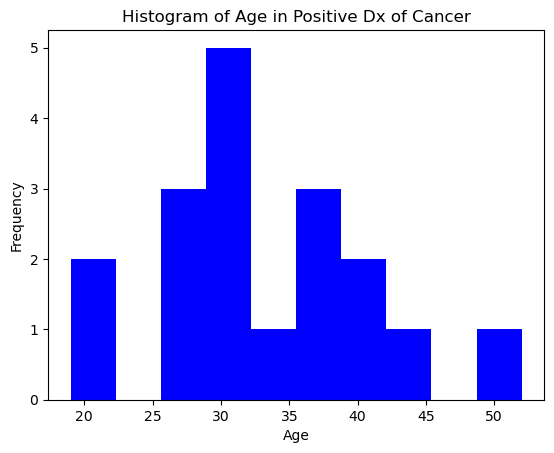

In [23]:

cancer_yes.hist(color = 'blue')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.title('Histogram of Age in Positive Dx of Cancer')

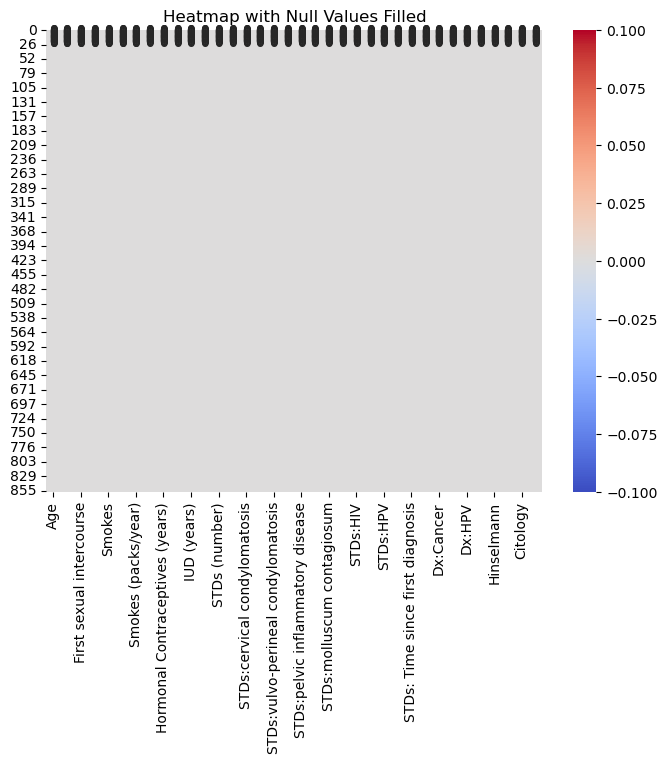

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cancer.isnull(), annot=True, cmap='coolwarm')
plt.title('Heatmap with Null Values Filled')
plt.show()


Text(0.5, 1.0, 'cervical cancer')

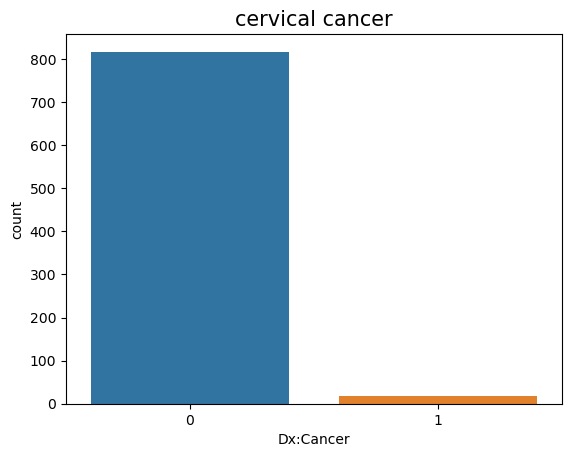

In [61]:
sns.countplot(x=cancer_md ['Dx:Cancer'])
plt.title('cervical cancer',fontsize=15)


Text(0.5, 1.0, 'histplot of Dx:CIN')

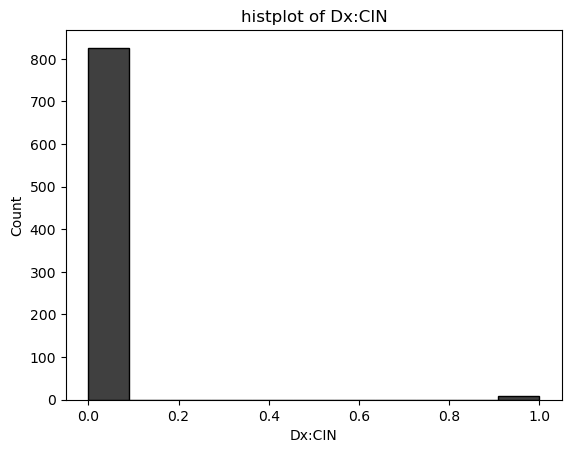

In [62]:
sns.histplot(x=cancer ["Dx:CIN"],data=cancer,color='k')
plt.title("histplot of Dx:CIN")

In [27]:
cancer_md.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [28]:
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [29]:
cancer_md['STDs:HPV'].value_counts()

STDs:HPV
0    733
?    100
1      2
Name: count, dtype: int64

In [30]:
cancer_md.duplicated().sum()

0

In [31]:
cancer_md['Dx:HPV'].value_counts()

Dx:HPV
0    817
1     18
Name: count, dtype: int64

In [32]:
cancer_md['Biopsy'].value_counts()

Biopsy
0    781
1     54
Name: count, dtype: int64

In [33]:
cancer_md['Citology'].value_counts()

Citology
0    792
1     43
Name: count, dtype: int64

In [34]:
cancer_md['Schiller'].value_counts()

Schiller
0    762
1     73
Name: count, dtype: int64

In [35]:
cancer_md['Hinselmann'].value_counts()

Hinselmann
0    800
1     35
Name: count, dtype: int64

In [36]:
cancer_md['Age'].value_counts()

Age
23    54
18    47
20    45
21    44
19    43
24    39
26    38
25    37
28    35
30    35
27    33
29    33
22    30
17    30
35    29
33    28
31    27
36    24
34    23
16    21
32    18
37    17
15    16
41    13
40    12
38     9
39     9
42     6
45     6
44     6
43     5
14     5
46     3
52     2
48     2
70     2
49     2
51     1
59     1
79     1
84     1
47     1
13     1
50     1
Name: count, dtype: int64

In [37]:
cancer_md['Smokes'].value_counts()

Smokes
0    699
1    123
?     13
Name: count, dtype: int64

In [38]:
cancer_md['Dx:CIN'].value_counts()

Dx:CIN
0    826
1      9
Name: count, dtype: int64

In [39]:




X= cancer_md[['Dx:HPV', 'Biopsy', 'Citology', 'Schiller', 'Hinselmann', 'Age', 'Dx:CIN']]
Y =cancer_md['Dx:Cancer']




In [40]:
X

,Dx:HPV,Biopsy,Citology,Schiller,Hinselmann,Age,Dx:CIN
0,0,0,0,0,0,18,0
1,0,0,0,0,0,15,0
2,0,0,0,0,0,34,0
3,1,0,0,0,0,52,0
4,0,0,0,0,0,46,0
...,...,...,...,...,...,...,...
853,0,0,0,0,0,34,0
854,0,0,0,0,0,32,0
855,0,0,1,0,0,25,0
856,0,0,0,0,0,33,0


In [41]:
Y.head(50)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: Dx:Cancer, dtype: int64

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [43]:
X_train.head(50)

,Dx:HPV,Biopsy,Citology,Schiller,Hinselmann,Age,Dx:CIN
111,0,0,0,0,0,32,0
610,1,1,0,1,1,21,0
340,0,0,0,0,0,19,0
674,0,0,0,0,0,42,0
109,1,0,0,0,0,32,0
751,0,0,0,0,0,41,0
214,0,1,0,1,1,30,0
471,0,0,0,0,0,18,0
302,0,0,0,0,0,23,0
685,0,0,0,0,0,49,0


In [44]:
X_train.tail(50)

,Dx:HPV,Biopsy,Citology,Schiller,Hinselmann,Age,Dx:CIN
29,0,0,0,0,0,37,0
336,0,0,0,0,0,22,0
448,0,0,0,0,0,17,0
474,0,0,0,0,0,33,0
303,0,0,0,0,0,25,0
102,0,0,0,0,0,31,0
80,0,0,0,0,0,33,0
646,0,0,1,1,0,16,0
846,0,0,0,0,0,35,0
412,0,0,0,0,0,18,0


In [45]:
Y_train.head(50)

111    0
610    1
340    0
674    0
109    0
751    0
214    0
471    0
302    0
685    0
692    0
742    0
738    1
136    0
427    0
166    0
313    0
134    0
605    0
729    0
55     0
304    0
206    0
320    0
576    0
506    0
48     0
768    0
708    0
357    0
354    0
177    0
823    0
704    0
385    0
56     0
469    0
233    0
387    0
699    0
294    0
245    0
355    0
144    0
487    0
92     0
743    0
713    0
526    0
636    0
Name: Dx:Cancer, dtype: int64

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
rf_md = RandomForestClassifier()

In [48]:
rf_md.fit(X_train, Y_train)

RandomForestClassifier()

In [49]:
y_rf=rf_md.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
model1=accuracy_score(Y_test,y_rf)
print(model1)

1.0


In [51]:
mse1= mean_squared_error(Y_test,y_rf)
print(mse1)

0.0


In [52]:

print(classification_report(Y_test,y_rf ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00         2

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167



In [53]:

from sklearn.svm import SVC



In [54]:
support=SVC()

In [55]:
support.fit(X_train,Y_train)

SVC()

In [56]:
y_sv=support.predict(X_test)

In [57]:
mse=mean_squared_error(y_sv,Y_test)
r2=accuracy_score(y_sv,Y_test)
print(mse)
print(r2)

0.011976047904191617
0.9880239520958084


In [58]:

print(classification_report(Y_test,y_sv))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       165
           1       0.00      0.00      0.00         2

    accuracy                           0.99       167
   macro avg       0.49      0.50      0.50       167
weighted avg       0.98      0.99      0.98       167



In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
log=LogisticRegression()

In [65]:
log.fit(X_train,Y_train)

LogisticRegression()

In [67]:
y_log=log.predict(X_test)

In [69]:
ac_log=accuracy_score(Y_test,y_log)
ac_log

1.0

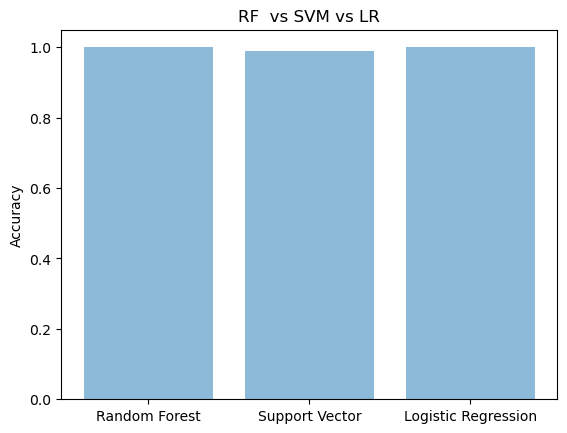

In [70]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Random Forest','Support Vector','Logistic Regression')
y_pos = np.arange(len(objects))
performance = [model1,r2,ac_log]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('RF  vs SVM vs LR')

plt.show()